## Group No 44

## Group Member Names:

1. BEDANTA BIKASH DUTTA (2024AA05186)
2. LELLA NIKHILESWAR (2024AA05976)
3. NIRMAL J (2024AA05189)
4. PRANAV DUBEY (2024AA05660)


# 1. Import the required libraries


In [1]:
##---------Type the code below this line------------------##

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adam
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc,
    log_loss,
    precision_recall_curve,
)
import time
from typing import cast

import tensorflow as tf
import tensorflow_datasets as tfds
import seaborn as sns
import tensorflow_hub as hub

c:\Users\sesa682918\Code\wilp-programs\natural-language-processing\.venv\Lib\site-packages\tensorflow_hub\__init__.py:61: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import parse_version


# 2. Data Acquisition -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Code for converting the above downloaded data into a form suitable for DL


In [2]:
##---------Type the code below this line------------------##

train_ds, test_ds = tfds.load(
    # Name of the dataset to load
    name="imdb_reviews",
    # By default there are 3 splits available train, test and unsupervised
    # We don't need the unsupervised set. For that purpose use split parameter
    split=["train", "test"],
)

# Convert the dataset to pandas DataFrame

train_df = tfds.as_dataframe(train_ds)
test_df = tfds.as_dataframe(test_ds)

imdb_reviews_df = pd.concat([train_df, test_df], ignore_index=True)

In [3]:
imdb_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   50000 non-null  int64 
 1   text    50000 non-null  object
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


In [4]:
imdb_reviews_df.head(5)

,label,text
0,0,"b""This was an absolutely terrible movie. Don't..."
1,0,b'I have been known to fall asleep during film...
2,0,b'Mann photographs the Alberta Rocky Mountains...
3,1,b'This is the kind of film for a snowy Sunday ...
4,1,"b'As others have mentioned, all the women that..."


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.


--------------Type the answers below this line--------------

1. Size of the dataset

   50,000

2. What type of data attributes are there?

   - text: movie review (string)
   - label: sentiment of the review (1/0)

3. What are you classifying?

   Binary classification of the sentiment of a movie review. 1 if positive 0 if negative

4. Plot the distribution of the categories of the target / label.


<Figure size 750x750 with 0 Axes>

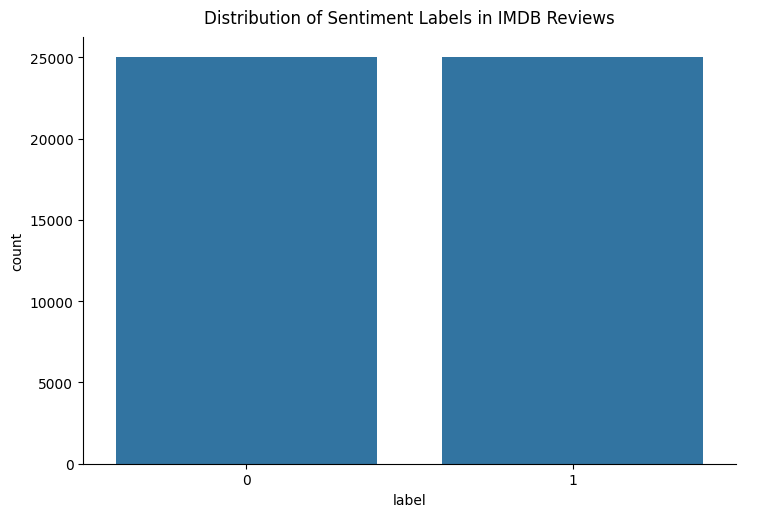

In [5]:
plt.figure(figsize=(5, 5), dpi=150)
sns.catplot(data=imdb_reviews_df, x="label", kind="count", height=5, aspect=1.5)
plt.title("Distribution of Sentiment Labels in IMDB Reviews", pad=10)
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.

This stage depends on the dataset that is used.


## 3.1 Apply pre-processing techiniques

- to remove duplicate data
- to impute or remove missing data
- to remove data inconsistencies
- Encode categorical data
- Normalize the data
- Feature Engineering
- Stop word removal, lemmatiation, stemming, vectorization

IF ANY


In [6]:
##---------Type the code below this line------------------##

# Remove duplicates
imdb_reviews_df = imdb_reviews_df.drop_duplicates()
# Remove NaN values
imdb_reviews_df = imdb_reviews_df.dropna()
# Reset index after dropping rows
imdb_reviews_df = imdb_reviews_df.reset_index(drop=True)
# The label is already in binary format, so we don't need to convert it
# To convert the text into embeddings we will use a pre trained embedding model
# from tensorflow_hub
# model_url "https://tfhub.dev/google/nnlm-en-dim128/2"
# Check the shape of the DataFrame
imdb_reviews_df.shape

(49582, 2)

In [7]:
# Model that generates 128-dimensional embeddings for English text
model_url = "https://tfhub.dev/google/nnlm-en-dim128/2"
model = hub.KerasLayer(model_url, trainable=False, input_shape=[], dtype=tf.string, name="embedding_layer")

model(imdb_reviews_df["text"].to_numpy()[:1])

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[ 9.01966274e-01, -4.83913347e-03,  1.17907055e-01,
         3.81319046e-01,  6.57222793e-02, -3.01581532e-01,
         8.90584365e-02, -2.69034863e-01, -8.51345584e-02,
         1.08877886e-02, -6.66372627e-02, -3.73063087e-01,
        -2.76447266e-01, -1.87254980e-01,  5.67507632e-02,
         9.09779966e-02, -6.24961555e-02, -3.28687276e-03,
        -3.08512092e-01,  3.78482223e-01,  7.62880966e-02,
         1.43733576e-01, -1.12897493e-01,  9.59761534e-03,
        -2.38938913e-01,  2.93743908e-02,  7.28663057e-02,
        -2.48727947e-02, -8.16893280e-02,  6.68320432e-02,
        -5.62225394e-02,  2.47078985e-01,  1.17681175e-01,
         3.17581035e-02,  2.65932620e-01, -1.37706831e-01,
        -1.50708258e-01, -1.63614675e-01, -1.51269153e-01,
         2.34616160e-01, -9.12236273e-02, -4.22684886e-02,
        -1.01224177e-01, -2.12229744e-01,  6.74503446e-02,
         1.85163647e-01,  3.62982228e-02, -3.50210071e-01,
      

## 3.2 Identify the target variables.

- Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

- Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.


In [8]:
##---------Type the code below this line------------------##
X = imdb_reviews_df["text"].to_numpy()
y = imdb_reviews_df["label"].to_numpy()

X.shape, y.shape

((49582,), (49582,))

## 3.3 Split the data into training set and testing set


In [9]:
##---------Type the code below this line------------------##

# 70% of the data will be used for training, 15% for validation, and 15% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

X_train.shape, X_validation.shape, X_test.shape

((34707,), (7437,), (7438,))

## 3.4 Preprocessing report

Mention the method adopted and justify why the method was used

- to remove duplicate data, if present
- to impute or remove missing data, if present
- to remove data inconsistencies, if present
- to encode categorical data
- the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset


##---------Type the answer below this line------------------##

- To remove duplicate data, we used the `drop_duplicates()` method from pandas.
- To remove missing data, we used the `dropna()` method from pandas.
- The data is text data, so didn't check for data inconsistencies.
- The label was already categorical (1/0), so no encoding was needed.
- For normalization an embedding model from tensorflow_hub will be used. (model_url = https://tfhub.dev/google/nnlm-en-dim128/2)
- Data was split into training, validation, and testing sets using `train_test_split` from sklearn. 70% of the data was used for training, 15% for validation, and 15% for testing.


# 4. Deep Neural Network Architecture - Score: Marks


## 4.1 Design the architecture that you will be using

- Sequential Model Building with Activation for each layer.
- Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
- Use Relu Activation function in each hidden layer
- Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.


In [10]:
##---------Type the code below this line------------------##
hub_layer = hub.KerasLayer(model_url, trainable=True, input_shape=[], dtype=tf.string, name="embedding_layer")
model = tf.keras.Sequential(
    [
        # hub layer raises an error due to backward compatibility: https://github.com/tensorflow/tensorflow/issues/63085#issuecomment-2303851416
        # So using a lambda wrapper around the hub layer using lambda layer
        tf.keras.layers.Lambda(lambda x: hub_layer(x)),
        tf.keras.layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## 4.2 DNN Report

Report the following and provide justification for the same.

- Number of layers
- Number of units in each layer
- Total number of trainable parameters


In [ ]:
##---------Type the answer below this line------------------##

# 5. Training the model - Score: 1 Mark


## 5.1 Configure the training

Configure the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.


In [ ]:
##---------Type the code below this line------------------##

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Use SGD.


In [ ]:
##---------Type the code below this line------------------##

Justify your choice of optimizers and regulizations used and the hyperparameters tuned


In [ ]:
##---------Type the answers below this line------------------##

# 6. Test the model - 0.5 marks


In [ ]:
##---------Type the code below this line------------------##

# 7. Intermediate result - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
##---------Type the code below this line------------------##

# 8. Model architecture - Score: 1 mark

Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)


In [ ]:
##---------Type the code below this line------------------##

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)


In [ ]:
##---------Type the code below this line------------------##

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
##---------Type the code below this line------------------##

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.


In [ ]:
##---------Type the code below this line------------------##

### NOTE

All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck
